In [498]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [499]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Data Input

In [500]:
test = pd.read_csv("Titanic_test.csv")
train = pd.read_csv("Titanic_train.csv")

In [501]:
train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [502]:
test.head(n=10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [503]:
y = train['Survived']
ID = test["PassengerId"]

In [504]:
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

# Data preparation/Visualization

In [505]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Missing Data

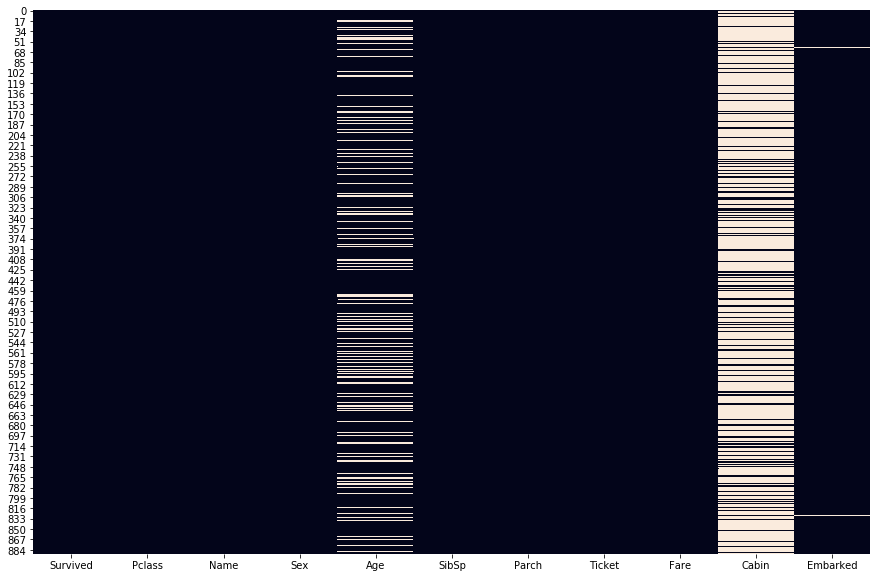

In [506]:
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull(), cbar=False)

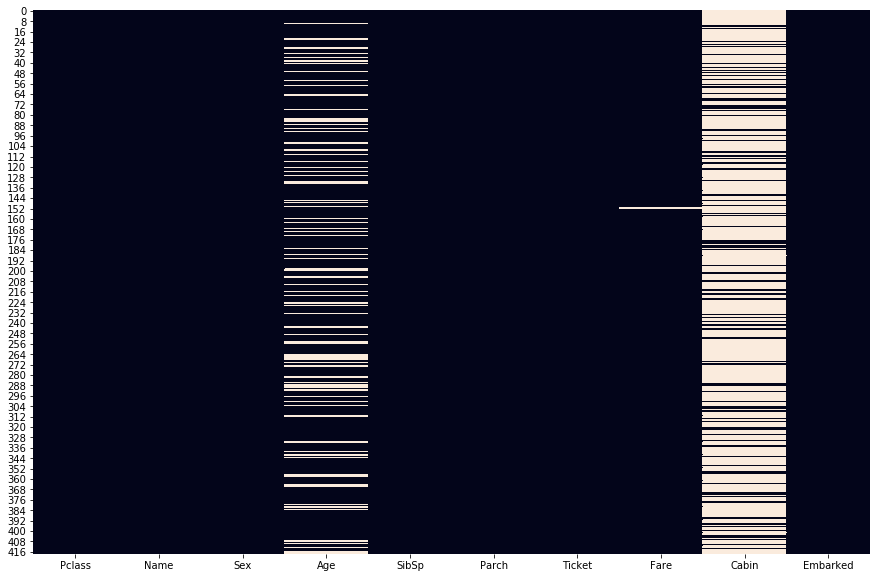

In [507]:
plt.figure(figsize=(15,10))
sns.heatmap(test.isnull(), cbar=False)

## Imputation 

In [508]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

#Fill Embarked with most common class
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)

#Fill Embarked with most common class
test['Fare'].fillna(test['Fare'].value_counts().index[0], inplace=True)

In [509]:
#Percent missing data
print('Percent missing in train: ', train['Age'].isnull().sum() * 100 / len(train['Age']))
print('Percent missing in test: ', test['Age'].isnull().sum() * 100 / len(test['Age']))

Percent missing in train:  19.865319865319865
Percent missing in test:  20.574162679425836


Age has a high rate of missing data but intuitively seems to be an informative feature.

Comparing survival rates against age, gender and class:

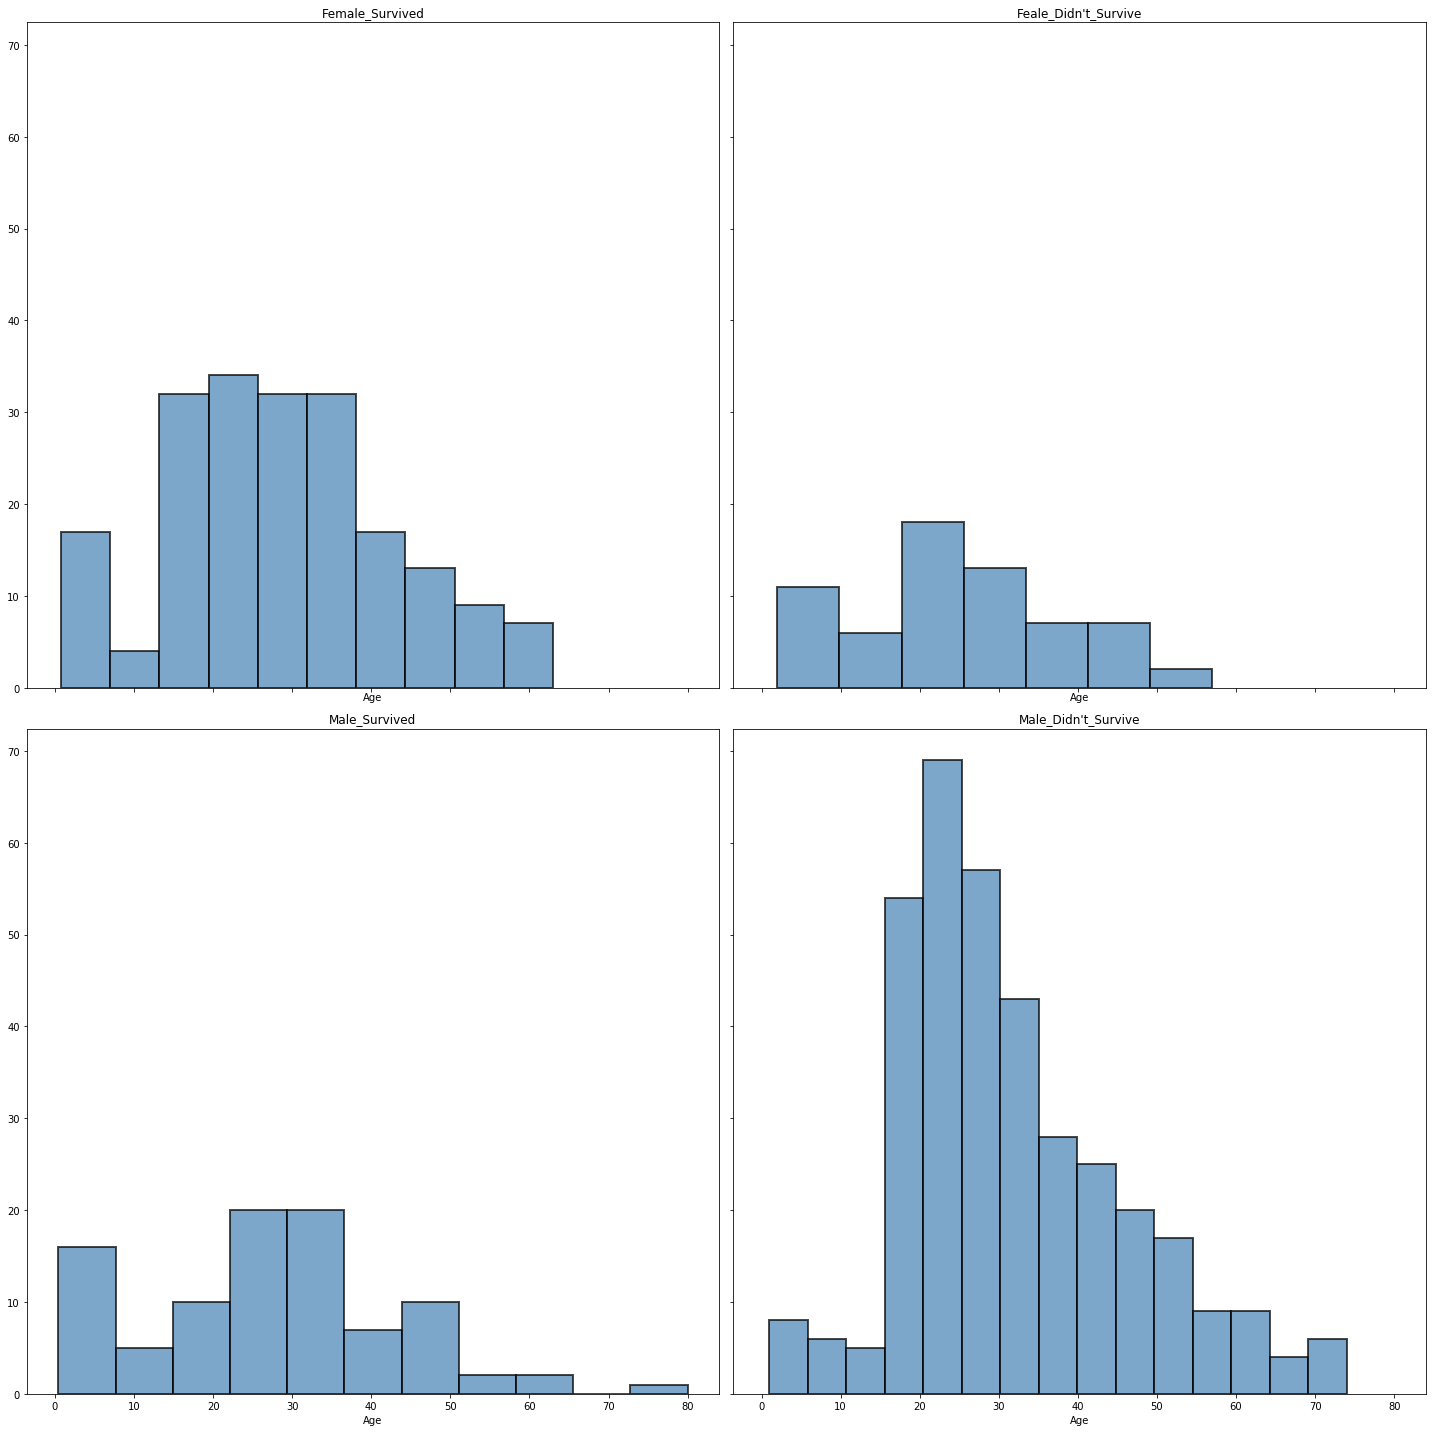

In [510]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 10), sharey=True, sharex=True)

women = train[train['Sex'] == "female"]
men = train[train['Sex'] == "male"]

ax = sns.distplot(women[women["Survived"]==1].Age.dropna(), ax = axes[0, 0], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
ax = sns.distplot(women[women["Survived"]==0].Age.dropna(), ax = axes[0, 1], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
axes[0, 0].set_title("Female_Survived")
axes[0, 1].set_title("Feale_Didn't_Survive")
plt.tight_layout(rect=(0, 0, 2, 2))

ax = sns.distplot(men[men["Survived"]==1].Age.dropna(), ax = axes[1, 0], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
ax = sns.distplot(men[men["Survived"]==0].Age.dropna(), ax = axes[1, 1], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
axes[1, 0].set_title('Male_Survived')
axes[1, 1].set_title("Male_Didn't_Survive")
plt.tight_layout(rect=(0, 0, 2, 2))

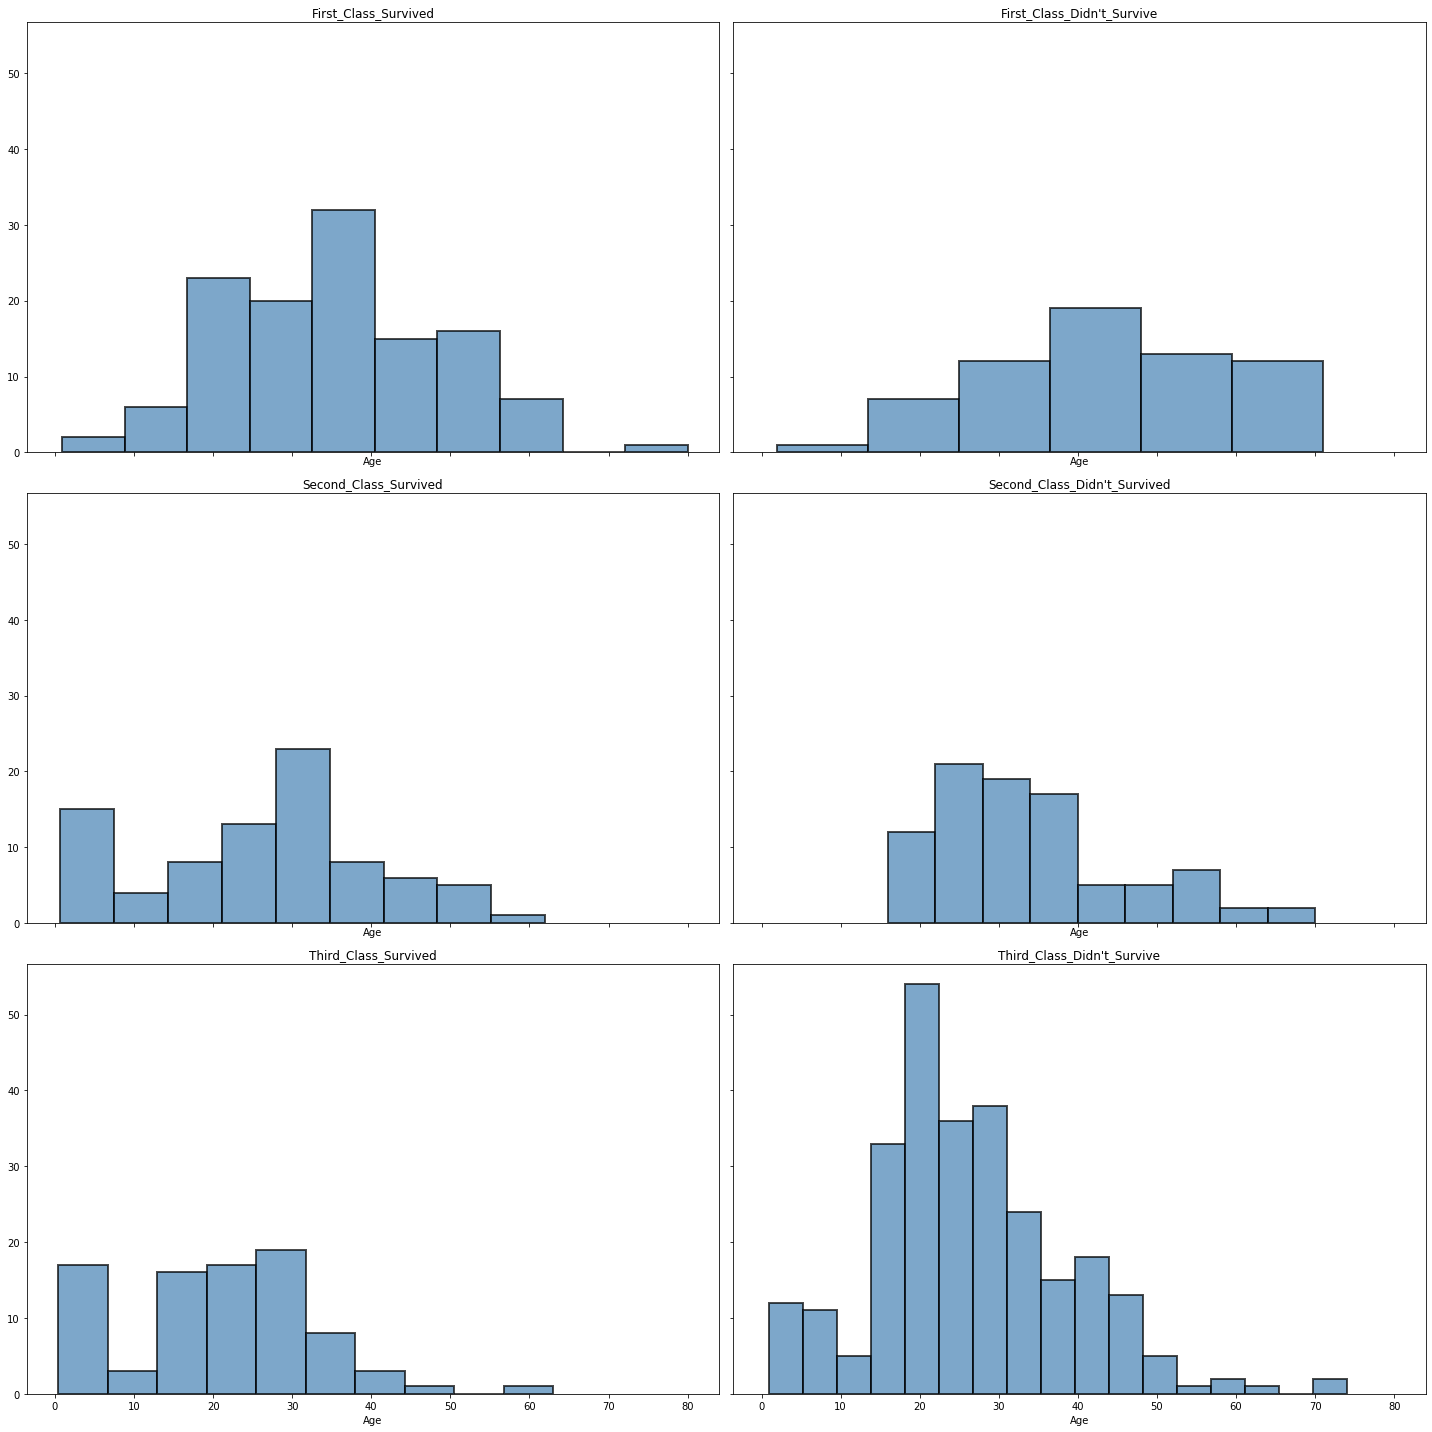

In [511]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10, 10), sharey=True, sharex=True)

first = train[train["Pclass"] == 1]
second = train[train["Pclass"] == 2]
third = train[train["Pclass"] == 3]

ax = sns.distplot(first[first["Survived"]==1].Age.dropna(), ax = axes[0, 0], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
ax = sns.distplot(first[first["Survived"]==0].Age.dropna(), ax = axes[0, 1], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
axes[0, 0].set_title("First_Class_Survived")
axes[0, 1].set_title("First_Class_Didn't_Survive")
plt.tight_layout(rect=(0, 0, 2, 2))

ax = sns.distplot(second[second["Survived"]==1].Age.dropna(), ax = axes[1, 0], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
ax = sns.distplot(second[second["Survived"]==0].Age.dropna(), ax = axes[1, 1], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
axes[1, 0].set_title("Second_Class_Survived")
axes[1, 1].set_title("Second_Class_Didn't_Survived")
plt.tight_layout(rect=(0, 0, 2, 2))

ax = sns.distplot(third[third["Survived"]==1].Age.dropna(), ax = axes[2, 0], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
ax = sns.distplot(third[third["Survived"]==0].Age.dropna(), ax = axes[2, 1], kde=False, hist_kws={"linewidth": 2, "alpha": 0.7, "color": "steelblue", "edgecolor": "black"})
axes[2, 0].set_title("Third_Class_Survived")
axes[2, 1].set_title("Third_Class_Didn't_Survive")
plt.tight_layout(rect=(0, 0, 2, 2))

Being young, male and in third class did not help survival rates.

Based on these results, a hot deck imputation method can be used to fill missing value based on similar examples (gender and class).

In [512]:
train['Age'].fillna(train.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace = True)

## Scaling

**Numerical Distributions**

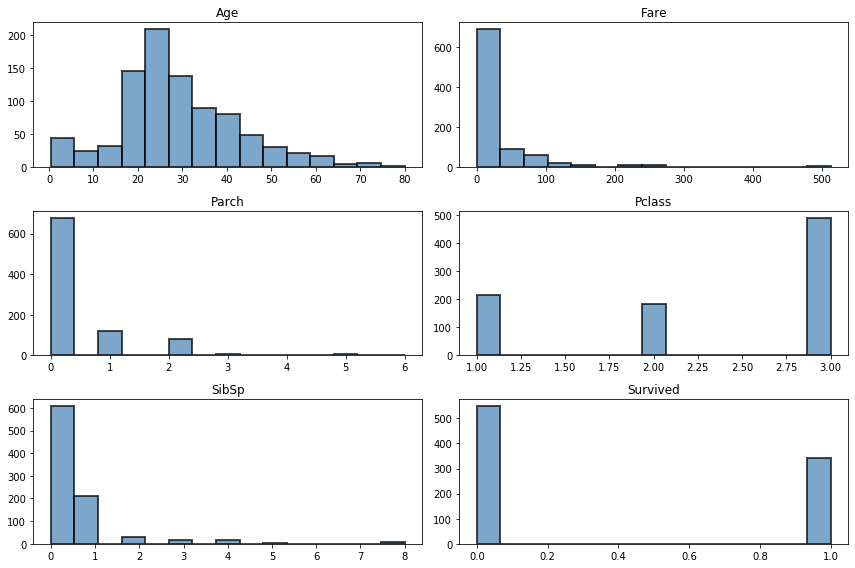

In [513]:
train.hist(bins=15, color='steelblue', edgecolor='black', 
           linewidth=2.0, xlabelsize=10, ylabelsize=10, grid=False, alpha=0.7)    
plt.tight_layout(rect=(0, 0, 2, 2))

**Categorical Distributions**

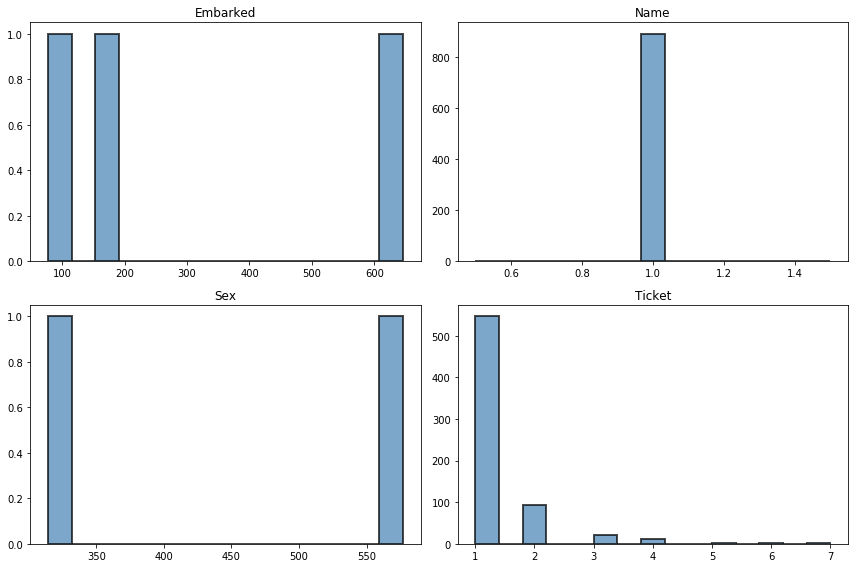

In [514]:
cat_train = train.select_dtypes('object')
cat_train.apply(pd.Series.value_counts).hist(bins=15, color='steelblue', edgecolor='black', 
           linewidth=2.0, xlabelsize=10, ylabelsize=10, grid=False, alpha=0.7)

#ax.set_xticks(cat_train.index)
#ax.set_xticklabels(cat_train.index.name, rotation=90)

plt.tight_layout(rect=(0, 0, 2, 2))

In [515]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

stdscale = StandardScaler()
robscale = RobustScaler()
mmscale = MinMaxScaler()

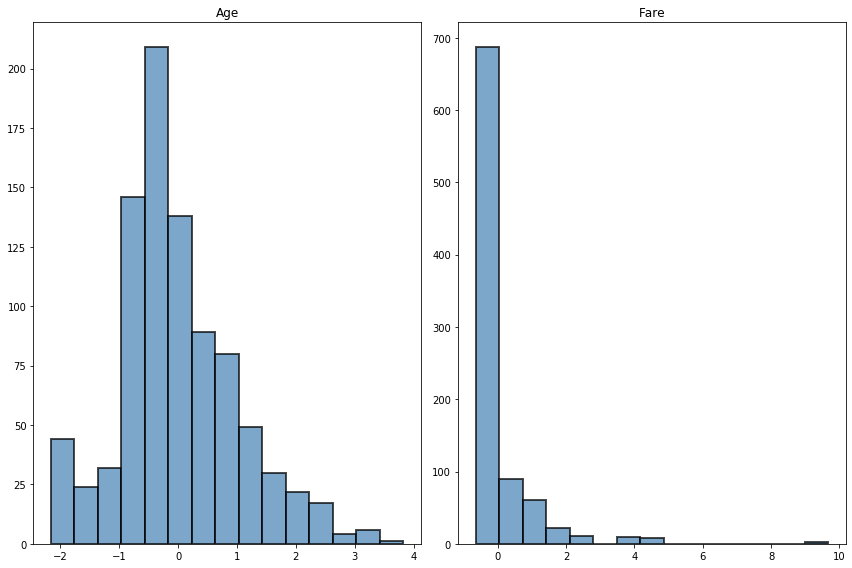

In [516]:
train_std = stdscale.fit_transform(train[["Age", "Fare"]])
test_std = stdscale.fit_transform(test[["Age", "Fare"]])

pd.DataFrame(train_std, columns = ["Age", "Fare"]).hist(bins=15, color='steelblue', edgecolor='black', 
           linewidth=2.0, xlabelsize=10, ylabelsize=10, grid=False, alpha=0.7)
plt.tight_layout(rect=(0, 0, 2, 2))

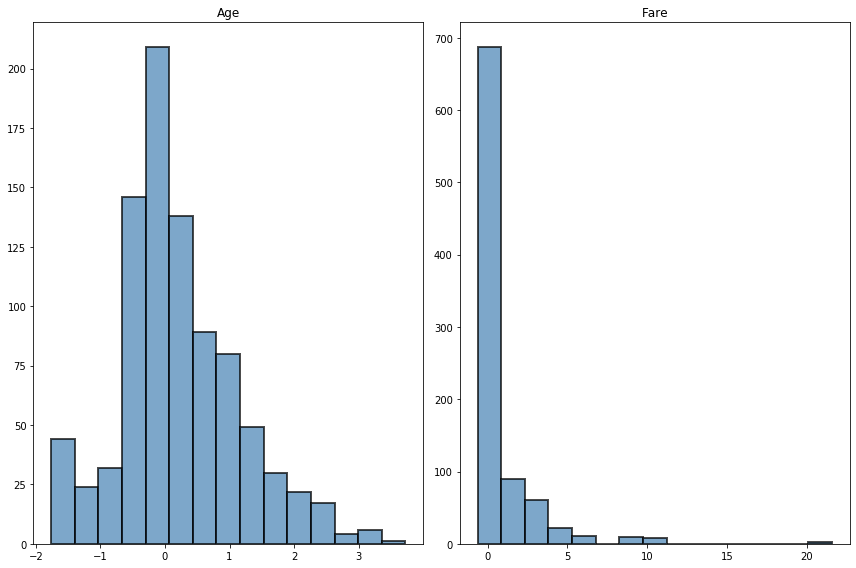

In [517]:
train_rob = robscale.fit_transform(train[["Age", "Fare"]])
test_rob = robscale.fit_transform(test[["Age", "Fare"]])

pd.DataFrame(train_rob, columns = ["Age", "Fare"]).hist(bins=15, color='steelblue', edgecolor='black', 
          linewidth=2.0, xlabelsize=10, ylabelsize=10, grid=False, alpha=0.7)
plt.tight_layout(rect=(0, 0, 2, 2))

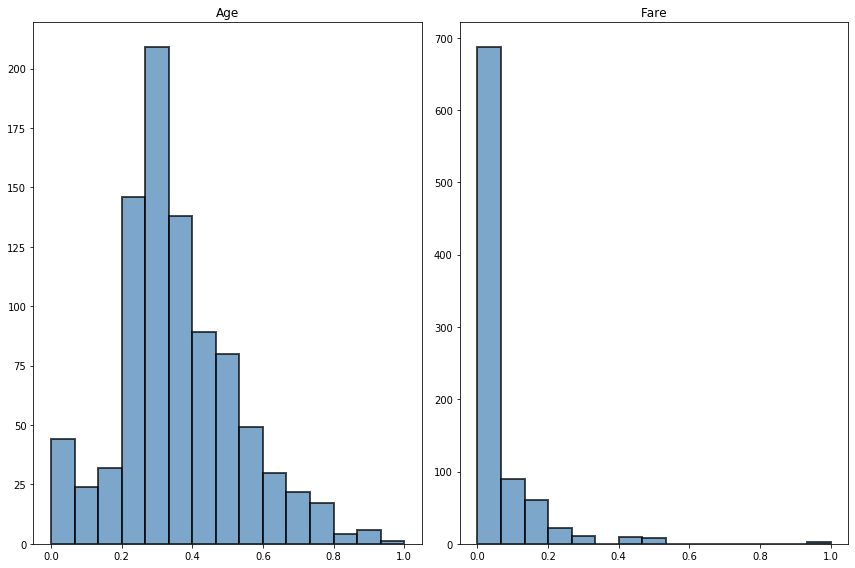

In [518]:
train_mm = mmscale.fit_transform(train[["Age", "Fare"]])
test_mm = mmscale.fit_transform(test[["Age", "Fare"]])

pd.DataFrame(train_mm, columns = ["Age", "Fare"]).hist(bins=15, color='steelblue', edgecolor='black', 
           linewidth=2.0, xlabelsize=10, ylabelsize=10, grid=False, alpha=0.7)
plt.tight_layout(rect=(0, 0, 2, 2))

All scalers give similar results, therefore will use Standard Scaler

In [519]:
train[["Age", "Fare"]] = stdscale.fit_transform(train[["Age", "Fare"]].values)
test[["Age", "Fare"]] = stdscale.fit_transform(test[["Age", "Fare"]].values)

## Outliers

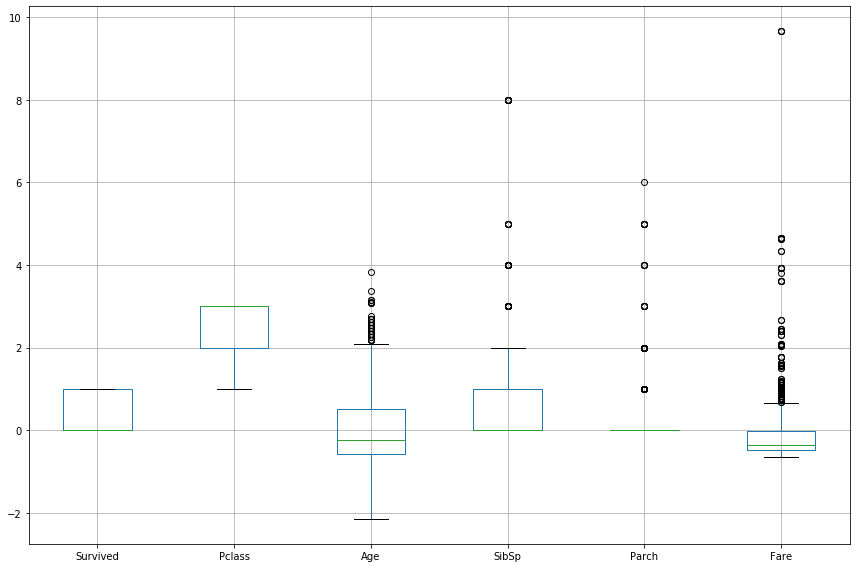

In [520]:
train.select_dtypes(['int64', 'float64']).boxplot()    
plt.tight_layout(rect=(0, 0, 2, 2))

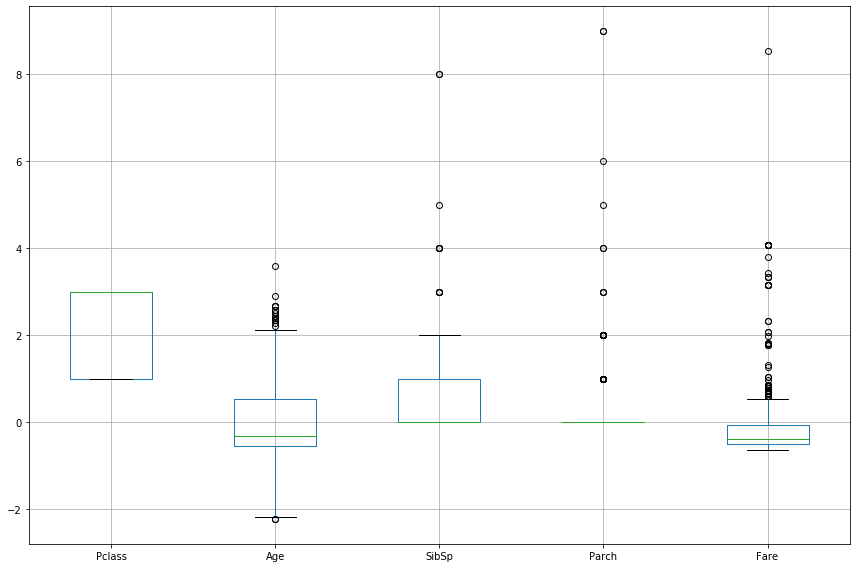

In [521]:
test.select_dtypes(['int64', 'float64']).boxplot()    
plt.tight_layout(rect=(0, 0, 2, 2))

In [522]:
#train_outlier_columns = ["Age", "Fare"]
#Q1 = train.quantile(.25)
#Q3 = train.quantile(.75)
#IQR = Q3 - Q1
#mask = (train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 *IQR))

#train[mask]
#train[mask]

## Feature Engineering

In [523]:
#Job title/Societal position

train["Title"] = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
test["Title"] = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]

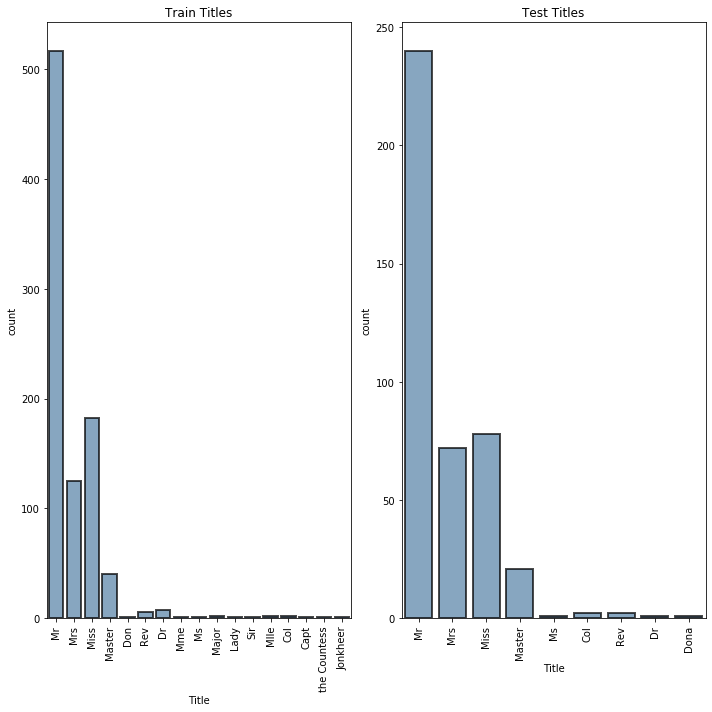

In [524]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 10))

ax1 = sns.countplot(train["Title"], linewidth = 2, alpha = 0.7, color = "steelblue", edgecolor = "black", ax = axes[0])
axes[0].set_title("Train Titles")
axes[0].set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = sns.countplot(test["Title"], linewidth = 2, alpha = 0.7, color = "steelblue", edgecolor = "black", ax = axes[1])
axes[1].set_title("Test Titles")
axes[1].set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.tight_layout(rect=(0, 0, 1, 1))

Mr, Mrs, Miss and Master are the most common titles. 
The other are rare and can be combined into an 'Other' category

In [525]:
train_counts = train["Title"].value_counts()
train_values = train["Title"].isin(counts.index[counts <= 40])

train.loc[values, "Title"] = "Other"

test_counts = test["Title"].value_counts()
test_values = test["Title"].isin(counts.index[counts <= 40])

test.loc[values, "Title"] = "Other"

In [526]:
train['Title'].value_counts()

Mr       517
Miss     182
Mrs      125
Other     67
Name: Title, dtype: int64

In [527]:
#Family size

train['Family'] = train["SibSp"] + train["Parch"]
test['Family'] = test["SibSp"] + test["Parch"]

In [528]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,0,3,"Braund, Mr. Owen Harris",male,-0.534891,1,0,A/5 21171,-0.502445,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.668392,1,0,PC 17599,0.786845,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,-0.234070,0,0,STON/O2. 3101282,-0.488854,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.442776,1,0,113803,0.420730,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,0.442776,0,0,373450,-0.486337,S,Mr,0


In [530]:
train.drop(["Survived", "Name", "Ticket", "SibSp", "Parch"], axis=1, inplace=True)
test.drop(["Name", "Ticket", "SibSp", "Parch"], axis=1, inplace=True)

## Encoding

In [531]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [532]:
train_dummies.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,-0.534891,-0.502445,1,0,1,0,0,1,0,1,0,0
1,1,0.668392,0.786845,1,1,0,1,0,0,0,0,1,0
2,3,-0.234070,-0.488854,0,1,0,0,0,1,1,0,0,0
3,1,0.442776,0.420730,1,1,0,0,0,1,0,0,1,0
4,3,0.442776,-0.486337,0,0,1,0,0,1,0,1,0,0


In [533]:
test_dummies.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Other
0,3,0.399451,-0.497063,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,3,1.359273,-0.511926,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,2.511059,-0.463754,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,3,-0.176442,-0.482127,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,3,-0.560371,-0.417151,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0


# Model Fitting

In [534]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [535]:
#Test/train split
X_train, X_test, y_train, y_test = train_test_split(train_dummies, y, test_size=0.33, random_state=42)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(train_std, y, test_size=0.33, random_state=42)
X_train_rob, X_test_rob, y_train_rob, y_test_rob = train_test_split(train_rob, y, test_size=0.33, random_state=42)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(train_mm, y, test_size=0.33, random_state=42)

In [536]:
kfold = KFold(n_splits=20, random_state=0, shuffle=True)

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return rmse

def rmsle(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_log_error", cv=kfold))
    return rmse

##### **Random Forest**

In [537]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#pred_log_train = logreg.predict(X_train)
pred_rf_test = rf.predict(X_test)

In [538]:
print("RF Accuracy: ", round(rf.score(X_train, y_train) * 100, 2))
print("RF mean square error: ", rmse_cv(rf, train_dummies, y).mean())

RF Accuracy:  97.99
RF mean square error:  0.4376352060554721


In [539]:
features_coeff1 = pd.Series(rf.feature_importances_, index = X_train.columns)
used_features_forest = features_coeff1[features_coeff1 != 0]
used_features_forest.sort_values(ascending=False)

Fare           0.256882
Age            0.223733
Sex_female     0.106433
Family         0.083274
Title_Mr       0.081063
Pclass         0.081040
Sex_male       0.078047
Title_Mrs      0.021924
Embarked_C     0.018305
Title_Miss     0.016697
Embarked_S     0.015810
Embarked_Q     0.008833
Title_Other    0.007959
dtype: float64

Text(0.5, 1.0, 'Coefficients for the selected features in the Random Forest Model')

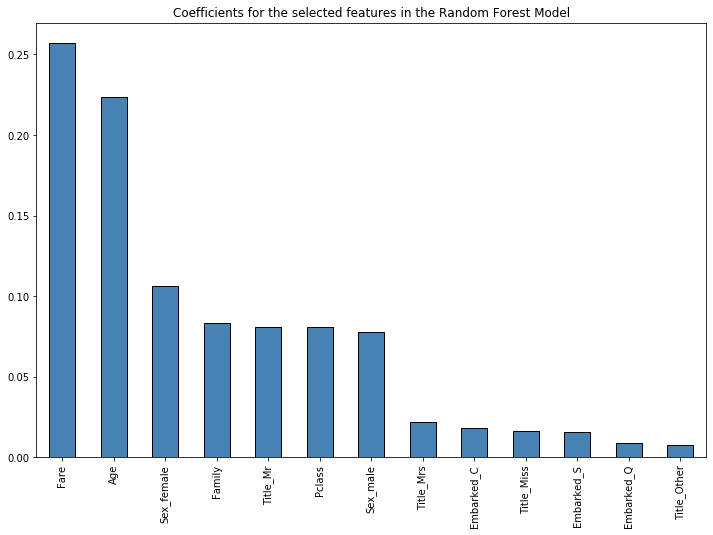

In [540]:
plt.figure(figsize=(10, 10))
used_features_forest.sort_values(ascending=False).plot(kind = "bar",figsize =(12,8), color = "steelblue", edgecolor='black')
plt.title("Coefficients for the selected features in the Random Forest Model")

## Feature Selection

In [541]:
train_dummies_filtered = train_dummies[["Pclass", "Age", "Fare", "Sex_female", "Sex_male", "Family", "Title_Mr"]]
test_dummies_filtered = test_dummies[["Pclass", "Age", "Fare", "Sex_female", "Sex_male", "Family", "Title_Mr"]]

X_train, X_test, y_train, y_test = train_test_split(train_dummies_filtered, y, test_size=0.33, random_state=42)

##### **Random Forest**

In [542]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#pred_log_train = logreg.predict(X_train)
pred_rf_test = rf.predict(X_test)

In [543]:
print("RF Accuracy: ", round(rf.score(X_train, y_train) * 100, 2))
print("RF mean square error: ", rmse_cv(rf, train_dummies_filtered, y).mean())

RF Accuracy:  97.99
RF mean square error:  0.4301161671049722


In [544]:
rf.fit(train_dummies_filtered, y)
pred_rf = rf.predict(test_dummies_filtered)

**Logistic Regression**

In [545]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

#pred_log_train = logreg.predict(X_train)
pred_log_test = logreg.predict(X_test)

In [546]:
#y1 = np.log1p(y)

In [547]:
print("Logistic Accuracy: ", round(logreg.score(X_train, y_train) * 100, 2))
print("Logistic mean square error: ", rmse_cv(logreg, train_dummies_filtered, y).mean())

Logistic Accuracy:  80.54
Logistic mean square error:  0.436337150437364


In [548]:
logreg.fit(train_dummies_filtered, y)
pred_log = logreg.predict(test_dummies_filtered)

**K-Nearest Neighbours**

In [549]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

#pred_log_train = logreg.predict(X_train)
pred_knn_test = knn.predict(X_test)

In [550]:
print("KNN Accuracy: ", round(knn.score(X_train, y_train) * 100, 2))
print("KNN mean square error: ", rmse_cv(knn, train_dummies_filtered, y).mean())

KNN Accuracy:  86.41
KNN mean square error:  0.4478851238354915


In [551]:
knn.fit(train_dummies_filtered, y)
pred_knn = knn.predict(test_dummies_filtered)

**Naive Bayes**

In [552]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_nb_test = gnb.predict(X_test)

In [553]:
print("Naive Bayes Accuracy: ", round(gnb.score(X_train, y_train) * 100, 2))
print("Naive Bayes mean square error: ", rmse_cv(gnb, train_dummies_filtered, y).mean())

Naive Bayes Accuracy:  78.02
Naive Bayes mean square error:  0.4627161910040199


In [554]:
gnb.fit(train_dummies_filtered, y)
pred_gnb = gnb.predict(test_dummies_filtered)

# Submission

In [555]:
df = pd.DataFrame({'PassengerId': ID, 'Survived':pred_log})

#df.to_csv('Titanic_Logistic.csv',index = False)